In [79]:
from sentinelhub import SHConfig

config = SHConfig()
print(config)
if config.instance_id == "":
    print("Warning! To use OGC functionality of Sentinel Hub, please configure the `instance_id`.")

{
  "instance_id": "********************************e28a",
  "sh_client_id": "********************************5072",
  "sh_client_secret": "****************************GVr2",
  "sh_base_url": "https://services.sentinel-hub.com",
  "sh_auth_base_url": null,
  "sh_token_url": "https://services.sentinel-hub.com",
  "geopedia_wms_url": "https://service.geopedia.world",
  "geopedia_rest_url": "https://www.geopedia.world/rest",
  "aws_access_key_id": "",
  "aws_secret_access_key": "",
  "aws_session_token": "",
  "aws_metadata_url": "https://roda.sentinel-hub.com",
  "aws_s3_l1c_bucket": "sentinel-s2-l1c",
  "aws_s3_l2a_bucket": "sentinel-s2-l2a",
  "opensearch_url": "http://opensearch.sentinel-hub.com/resto/api/collections/Sentinel2",
  "max_wfs_records_per_query": 100,
  "max_opensearch_records_per_query": 500,
  "max_download_attempts": 3,
  "download_sleep_time": 5.0,
  "download_timeout_seconds": 120.0,
  "number_of_download_processes": 1
}


In [80]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [81]:
from sentinelhub import CRS, BBox, DataCollection, MimeType, WcsRequest, WmsRequest
import datetime
import matplotlib.pyplot as plt
import numpy as np
import imageio

In [82]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    plt.subplots(nrows=1, ncols=1, figsize=(15, 7))

    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

Goal : checkout 2022 fires in Girond 

Date :

12/07/2022
14/08/2022


Localization :
"Landiras"
2nd largest fire in France's recent history since 1949 Landes forest fire

Two interesting things to checkout: 
- moisture index before / after the fire 
- IR land temperature during the fire 

In [83]:

landiras_coords_wgs84 = (-0.55, 44.57, -0.48, 44.52)
landiras_bbox = BBox(bbox=landiras_coords_wgs84, crs=CRS.WGS84)
landiras_bbox
start_date = datetime.datetime(2022, 7, 12)
end_date = datetime.datetime(2022, 8, 14)
data_collection = DataCollection.SENTINEL2_L1C
layer = "FALSE-COLOR"

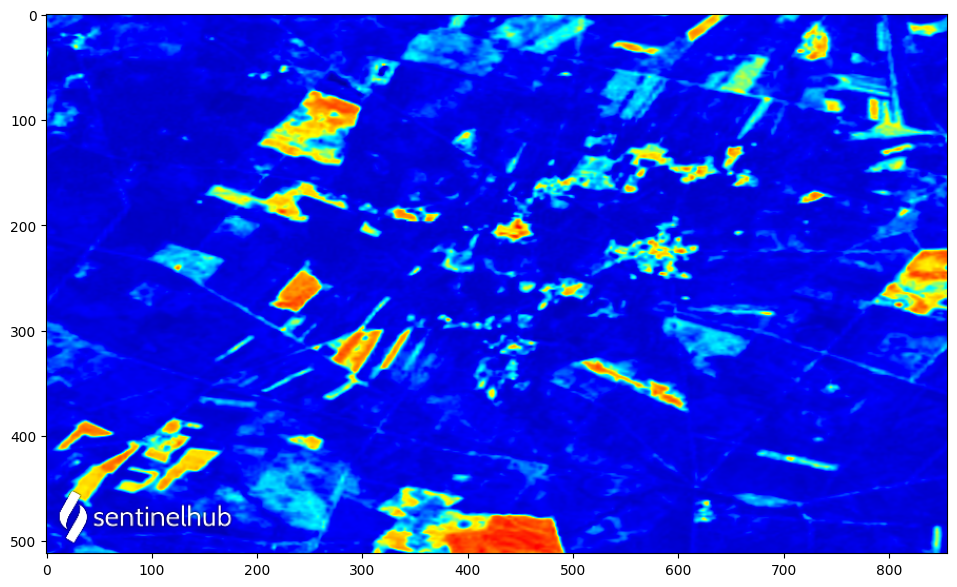

In [84]:
# visualize the area of interest
date_str = start_date.strftime("%Y-%m-%d")
wms_request = WmsRequest(
    data_collection=data_collection,
    layer=layer,
    bbox=landiras_bbox,
    time=date_str,
    width=856,
    height=512,
    config=config,
)
wms_image = wms_request.get_data()
if len(wms_image) > 1: 
    plot_image(wms_image[-1])

In [85]:
img_array = []

# Loop through dates
current_date = start_date
while current_date <= end_date:
    date_str = current_date.strftime("%Y-%m-%d")
    wms_request = WmsRequest(
        data_collection=data_collection,
        layer=layer,
        bbox=landiras_bbox,
        time=date_str,
        width=856,
        height=512,
        config=config,
    )
    wms_img = wms_request.get_data()
    current_date += datetime.timedelta(days=1)
    if len(wms_image) > 0: 
        img_array.append(wms_image[-1])

In [ ]:
print("Returned images: %d." % (len(img_array)))

Returned images: 34.


In [ ]:
# simple gif
filename = "landiras.gif"
with imageio.get_writer(filename, mode='I', duration=1000) as writer:
        for image in img_array:
            writer.append_data(image)

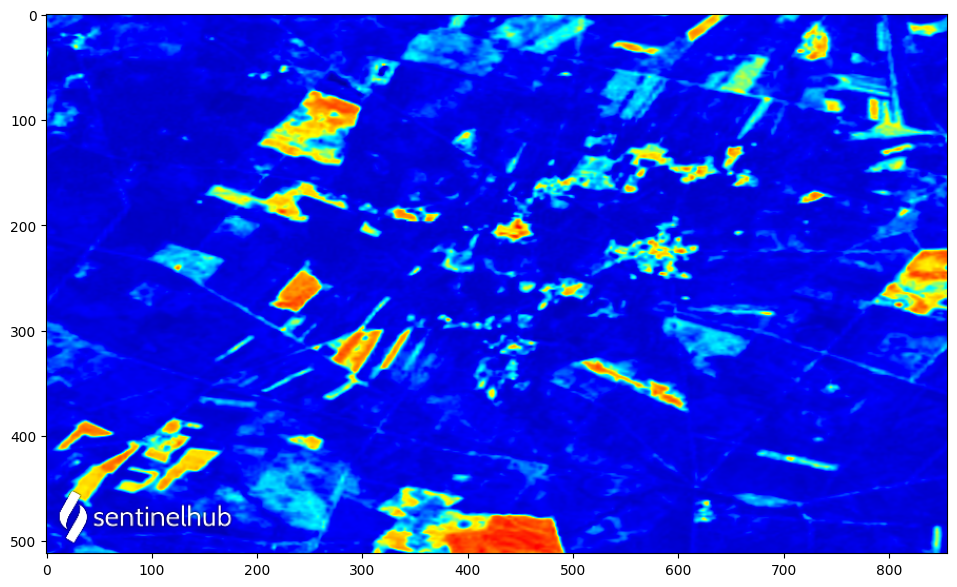

In [ ]:
plot_image(img_array[1])

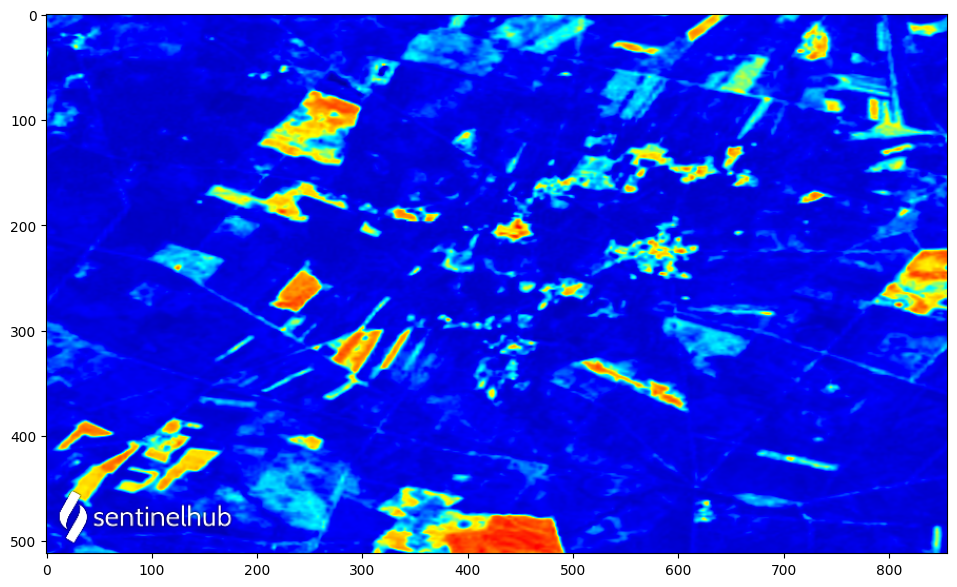

In [ ]:
plot_image(img_array[-1])